# MCMC

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy.random import seed, rand

In [2]:
%config InlineBackend.figure_format = "retina"

In [14]:
S = np.array([[0.4, -0.1]]).T
S = np.exp(S @ S.T)
mu = np.array([0, 0])

In [ ]:
N = multivariate_normal(mean=mu, cov=S)

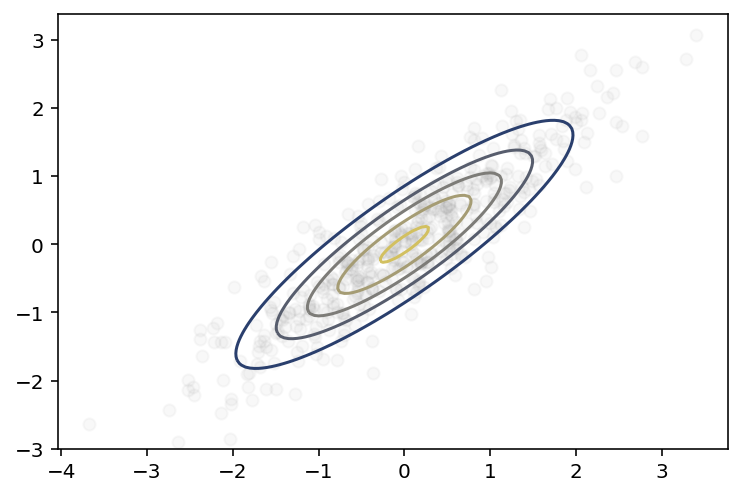

In [51]:
seed(314)
X = np.mgrid[-3:3:0.05, -3:3:0.05]
Z = np.apply_along_axis(N.pdf, 0, X)
obs = N.rvs(500)
plt.scatter(*obs.T, alpha=0.05, c="tab:gray")
plt.contour(*X, Z, levels=5, cmap="cividis");

Let our proposal distribution be 

$$
    q(z_A | z_B) = \mathcal{N}(z_A | z_B, c{\bf I})
$$

In [250]:
c = 0.1
z = obs.mean(axis=0)

seed(271)
samples = []
nrounds = 0
nsamples = 300
while len(samples) < nsamples:
    nrounds += 1
    q = multivariate_normal(z, cov=c)
    z_star = q.rvs()

    A = min(1, N.pdf(z_star) / N.pdf(z))
    if A > rand():
        samples.append(z_star)
        z = z_star
samples = np.c_[samples]

In [251]:
proportion_accepted = nsamples / nrounds
print(f"prop. accepted = {proportion_accepted:0.2%}")

prop. accepted = 70.92%


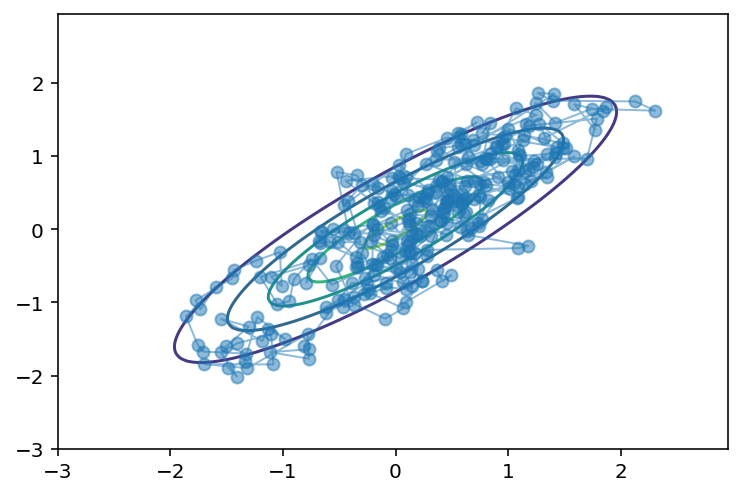

In [252]:
plt.plot(*np.c_[samples].T, alpha=0.5, marker="o", linewidth=1)
plt.contour(*X, Z, levels=5)
plt.ylim();

## Animating the Chain

In [253]:
import matplotlib.animation as animation

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


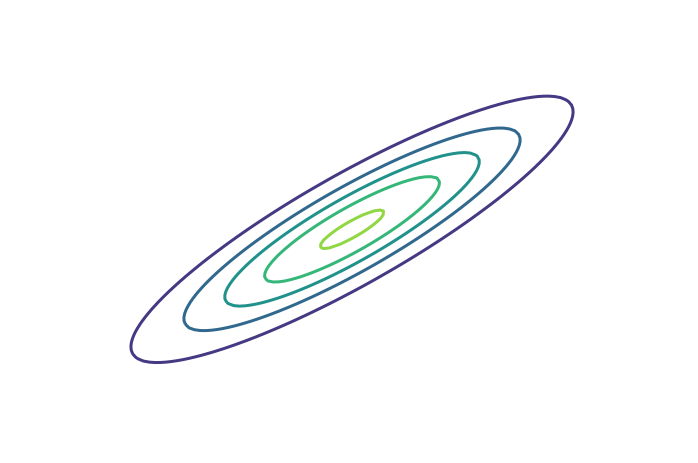

In [257]:
fig, ax = plt.subplots()
ntrail = 10
def animate(i):
    ax.cla()
    if i < ntrail:
        trail = samples[:i]
    else:
        trail = samples[i - ntrail: i]
    ax.plot(*trail.T, alpha=0.8, marker="o", linewidth=1)
    ax.contour(*X, Z, levels=5)
    ax.set_ylim()
    ax.axis("off")

ani = animation.FuncAnimation(fig, animate, 200, interval=300)
ani.save("mcmc.gif", writer="imagemagick", fps=50, dpi=250)